In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = np.load('000039dca2.npy')

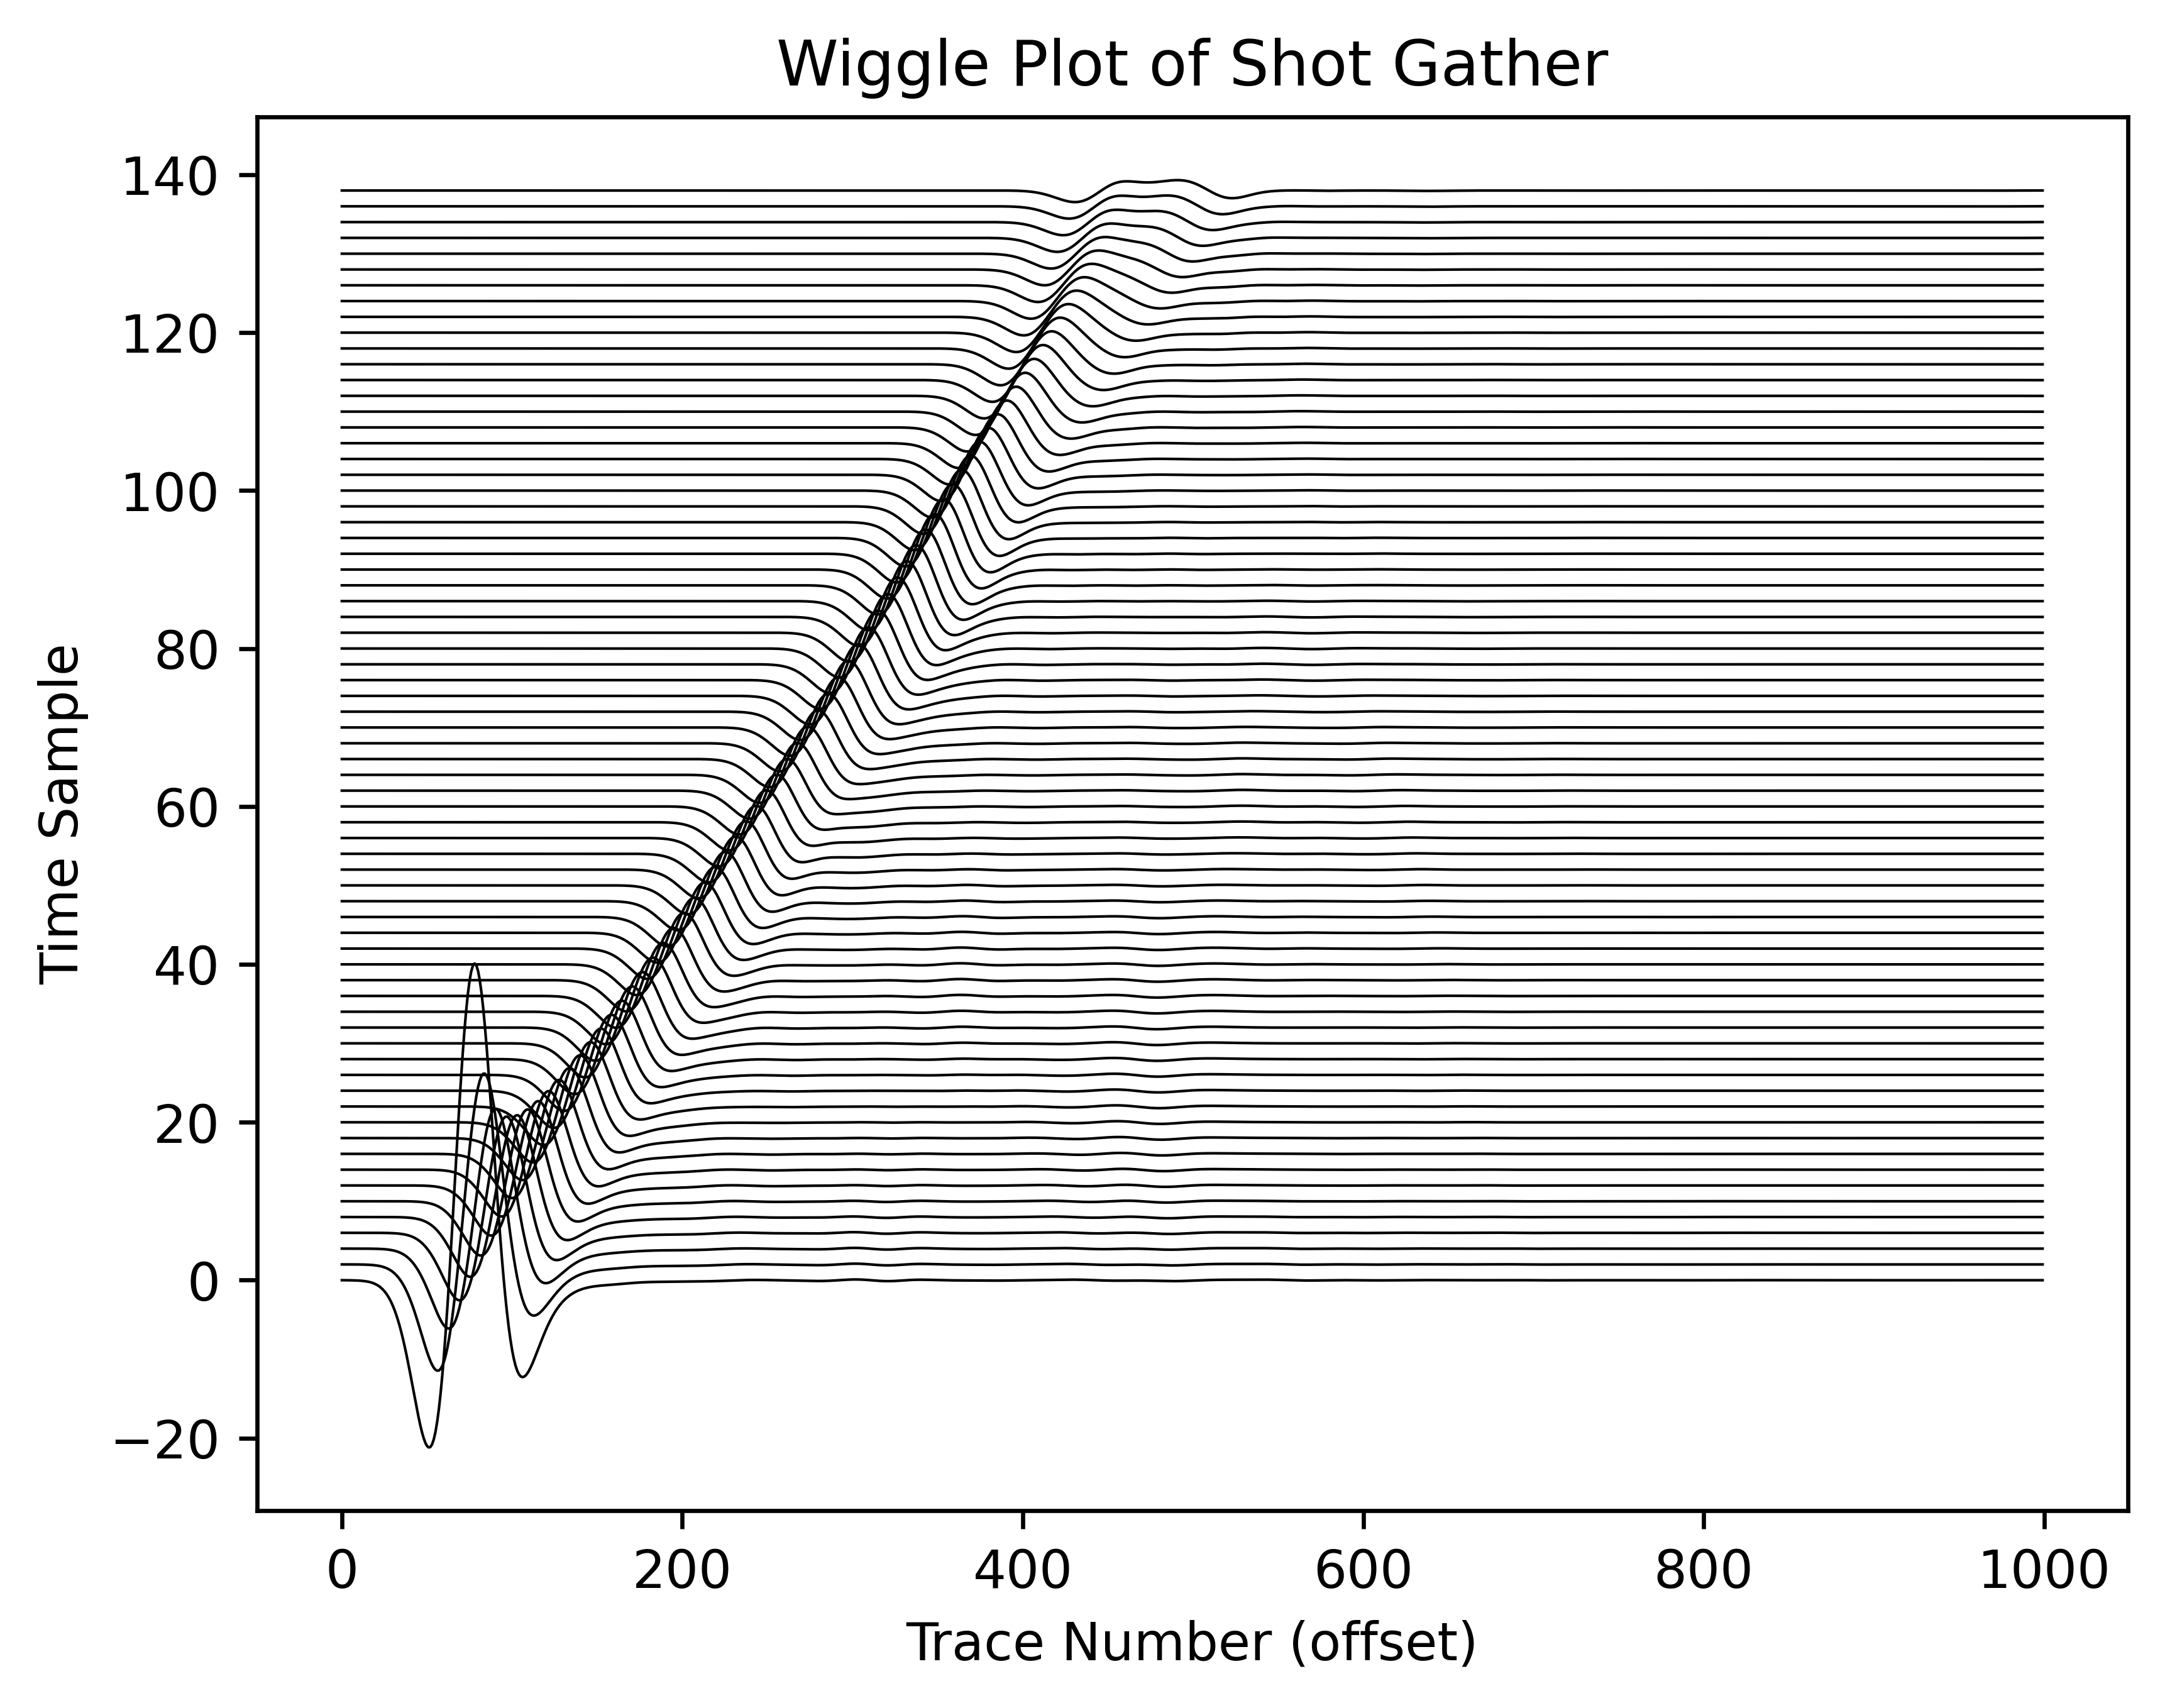

In [3]:
shot_idx = 0 
gather = data[shot_idx]

plt.figure(dpi=600)
offset = 2  # 控制道间隔
for i in range(gather.shape[1]):
    plt.plot(gather[:, i] + i * offset, color='black', lw=0.5)
plt.xlabel('Trace Number (offset)')
plt.ylabel('Time Sample')
plt.title('Wiggle Plot of Shot Gather')
plt.show()

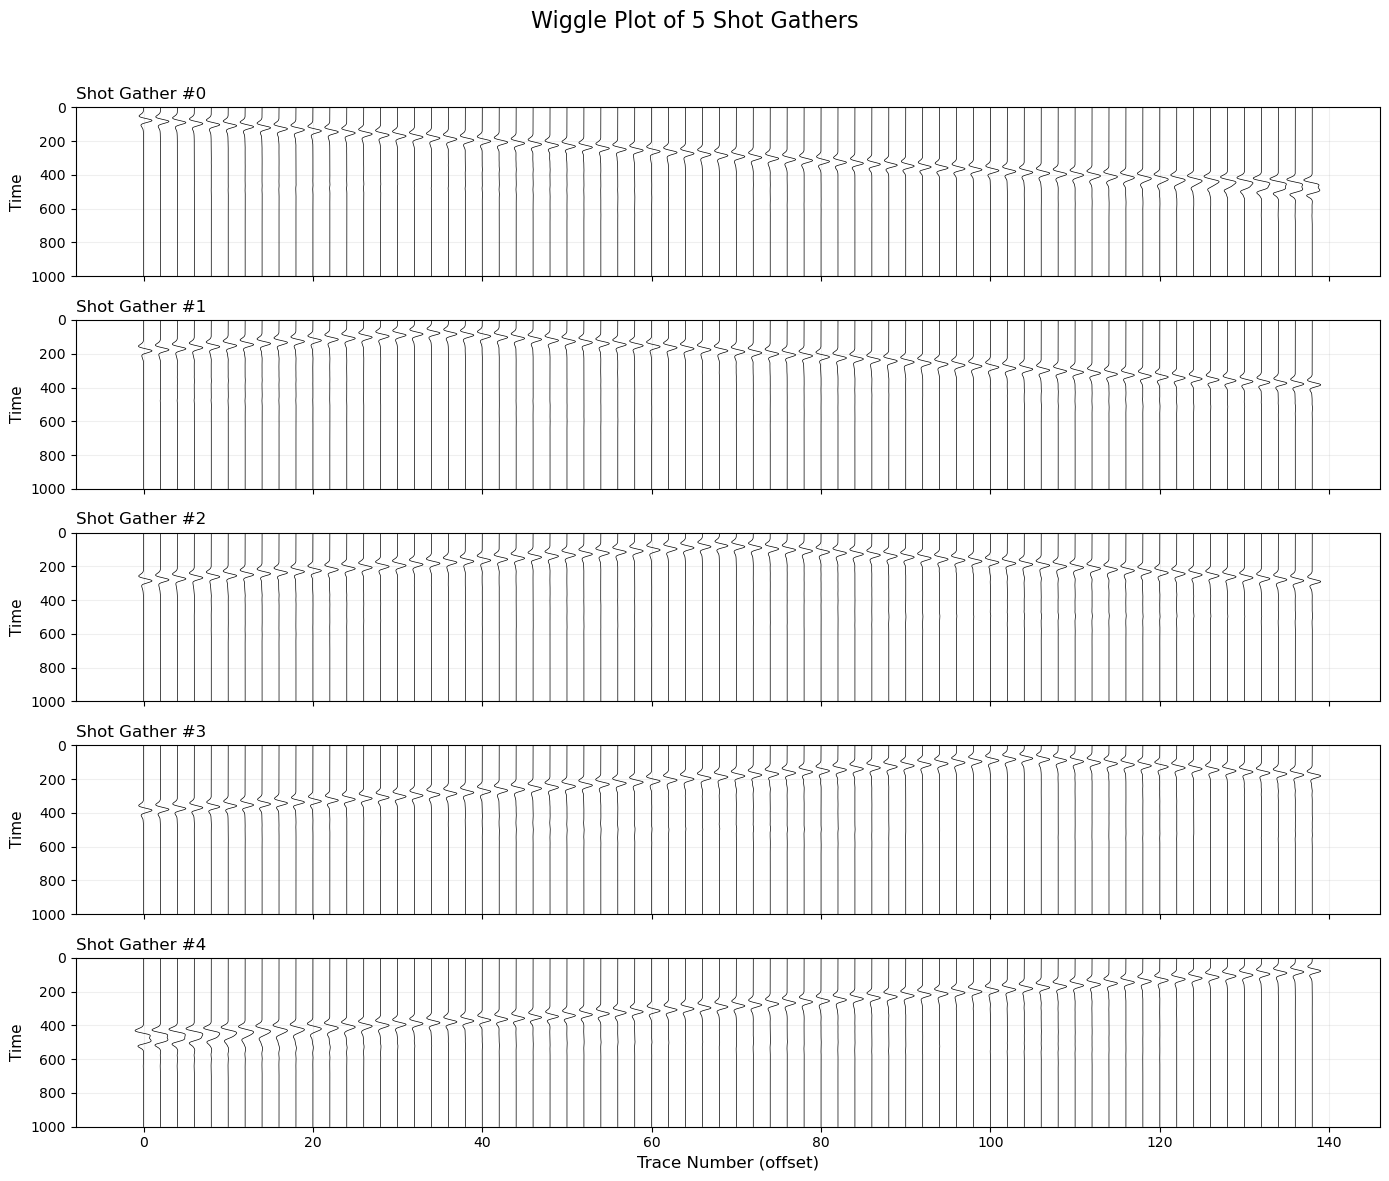

In [4]:
n_shots = data.shape[0]
offset = 2

fig, axs = plt.subplots(n_shots, 1, figsize=(14, 12), sharex=True, sharey=True)

for shot_idx in range(n_shots):
    gather = data[shot_idx]  # (1000, 70)
    # 归一化每道
    norm_gather = gather / (np.max(np.abs(gather), axis=0, keepdims=True) + 1e-10)
    ax = axs[shot_idx]
    for i in range(norm_gather.shape[1]):
        trace = norm_gather[:, i] + i * offset
        ax.plot(trace, np.arange(norm_gather.shape[0]), color='black', lw=0.5)
    ax.set_ylim(norm_gather.shape[0], 0)
    ax.set_ylabel('Time', fontsize=11)
    ax.set_title(f'Shot Gather #{shot_idx}', fontsize=12, loc='left')
    ax.grid(alpha=0.2)

axs[-1].set_xlabel('Trace Number (offset)', fontsize=12)
plt.suptitle('Wiggle Plot of 5 Shot Gathers', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

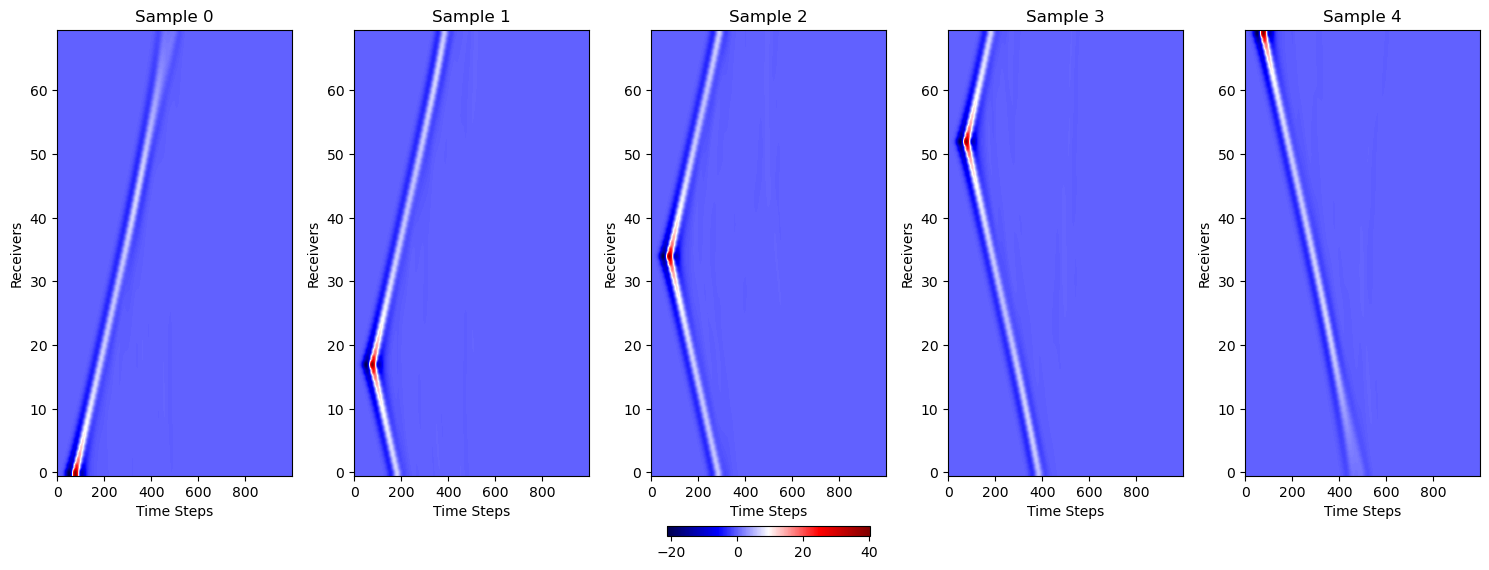

In [5]:
def visualize_all_samples(data):
    """
    可视化所有样本的二维热力图
    :param data: 地震波数据，形状为 (5, 1000, 70)
    """
    num_samples = data.shape[0]
    fig, axes = plt.subplots(1, num_samples, figsize=(15, 6))
    for i in range(num_samples):
        ax = axes[i]
        ax.imshow(data[i].T, aspect='auto', cmap='seismic', origin='lower')
        ax.set_title(f"Sample {i}")
        ax.set_xlabel("Time Steps")
        ax.set_ylabel("Receivers")
    plt.tight_layout()
    plt.colorbar(axes[0].images[0], ax=axes, orientation='horizontal', fraction=0.02, pad=0.1)
    plt.show()

visualize_all_samples(data)

In [6]:
submission = pd.read_csv('submission_median.csv')

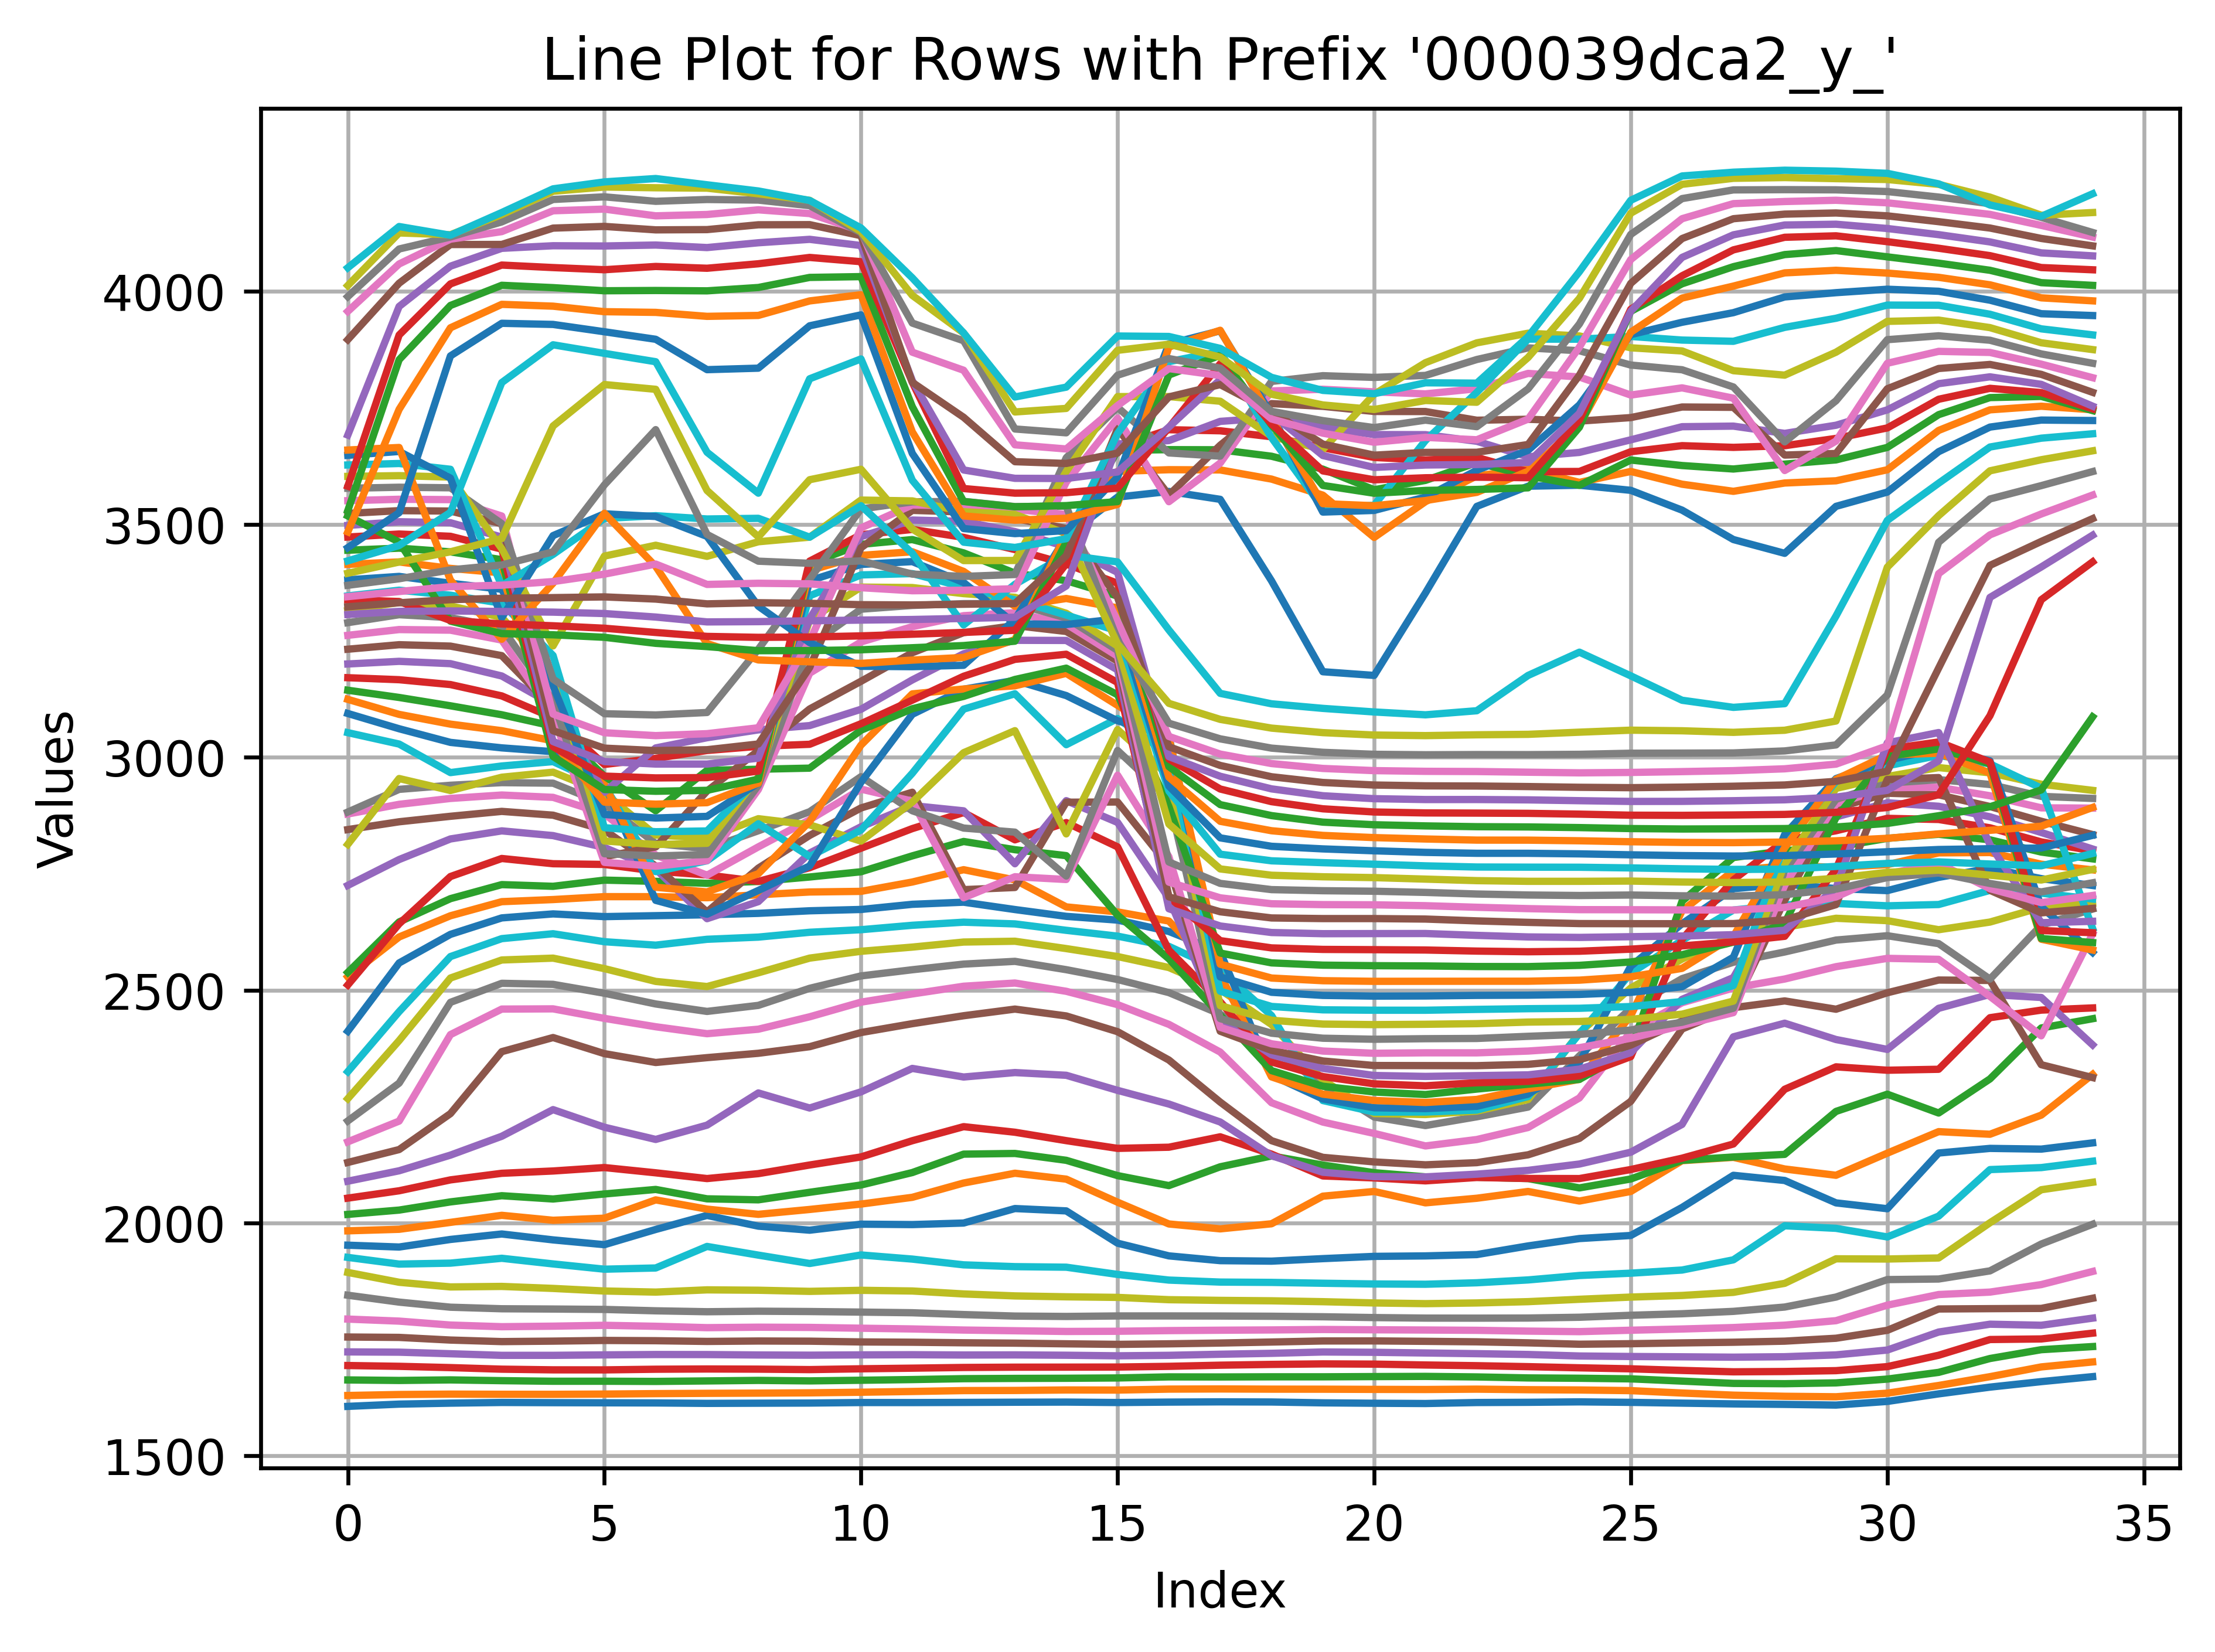

In [7]:
import matplotlib.pyplot as plt

prefix = "000039dca2_y_"
filtered_df = submission[submission["oid_ypos"].str.startswith(prefix)]

plt.figure(dpi=600)

for _, row in filtered_df.iterrows():
    y_values = row.iloc[1:].values  # 从第2列开始是数值数据
    plt.plot(range(len(y_values)), y_values)

plt.title("Line Plot for Rows with Prefix '000039dca2_y_'")
plt.xlabel("Index")
plt.ylabel("Values")
plt.grid(True)
plt.tight_layout()

plt.show()